# Import Data

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [2]:
mclab = os.getenv('MCLAB')
fname = os.path.join(mclab, 'cegs_ase_paper/pipeline_output/qsim_bayesian/qsim_bias_wide.csv')
dat = pd.read_csv(fname, index_col='fusion_id')
dat.head(3)

,_NAME_,r101,r109,r136,r149,r181,r208,r21,r217,r228,...,w52,w55,w59,w64,w67,w68,w74,w76,w79,percent_bias
fusion_id,,,,,,,,,,,,,,,,,,,,,
F10001_SI,qsim_line,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.500000,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.000000
F10005_SI,qsim_line,0.500000,0.500000,0.500000,0.500000,0.500000,0.5,0.500000,0.5,0.516484,...,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,1.470588
F10009_SI,qsim_line,0.500921,0.500921,0.500921,0.501416,0.500921,0.5,0.500921,0.5,0.500921,...,0.500921,0.500921,0.500752,0.500921,0.500921,0.500921,0.500921,0.500921,0.500921,91.176471


## Mask data for plotting

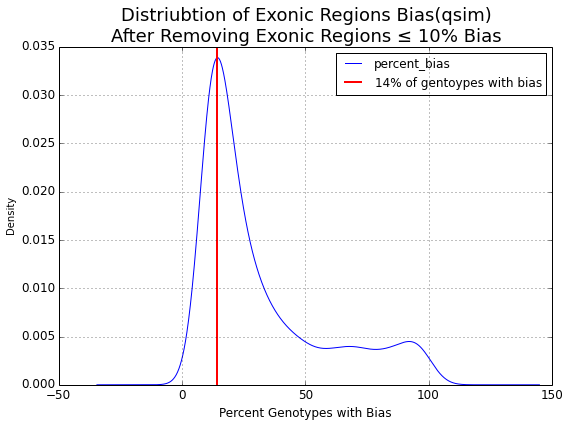

In [3]:
# Pull out only the columns with qsim value
pc = dat[dat['percent_bias'] >=10]
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
pc['percent_bias'].plot(kind='kde', ax=ax, fontsize=12)
plt.xlabel('Percent Genotypes with Bias', fontsize=12)
plt.axvline(14, color='r', lw=2, label='14% of gentoypes with bias')
plt.legend()
plt.title(u'Distriubtion of Exonic Regions Bias(qsim)\nAfter Removing Exonic Regions ≤ 10% Bias', fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(mclab,'cegs_ase_paper/pipeline_output/qsim_bayesian/qsim_density_percent_bias_gt10.png'))

## Boxplot to look at if certain lines have more bias than others

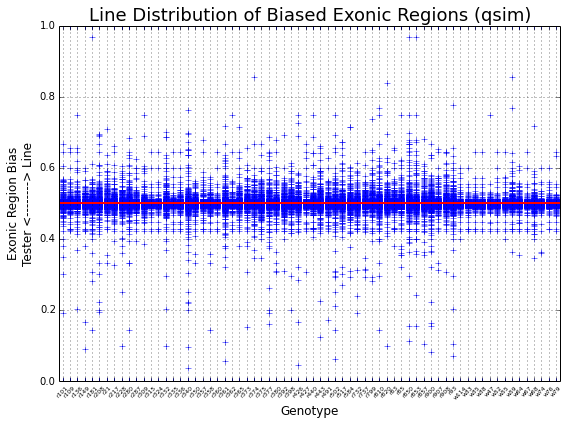

In [4]:
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111)
mk = dat.ix[:,1:-1]
mk.boxplot(return_type='axes', ax=ax, rot=45, fontsize=6)
ax.axhline(0.5, color='r', lw=2)
plt.xlabel('Genotype', fontsize=12)
plt.ylabel(u'Exonic Region Bias\nTester <--------> Line', fontsize=12)
plt.title('Line Distribution of Biased Exonic Regions (qsim)', fontsize=18)
plt.tight_layout()
plt.savefig(os.path.join(mclab,'cegs_ase_paper/pipeline_output/qsim_bayesian/qsim_line_bias.png'))